# Example for SGCSL model.

In [1]:
import sys
sys.path.append('..')

### Data preparation.

In [2]:
from causal.synthetic_dataset import generate_thp
device_edges, event_edges, x = generate_thp(n_devices=20, n_events=10)
print('Shape of device edges:', device_edges.shape)
print('Shape of event edges:', event_edges.shape)
print('Shape of event sequences:', x.shape)

100%|██████████| 20/20 [00:00<00:00, 37332.48it/s]

Shape of device edges: (20, 20)
Shape of event edges: (10, 10)
Shape of event sequences: (144, 4)


### Fit the model.

In [3]:
import os
import torch
from causal.discovery import SGCSL
device = 'cuda' if torch.cuda.is_available() else 'cpu'
os.makedirs('./checkpoints/', exist_ok=True)

In [4]:
n_devices, n_events = device_edges.shape[0], event_edges.shape[0]
model = SGCSL(n_devices, n_events).to(device)
model.fit(x, device_edges)

Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 584.49it/s, Loss: 701293.1875]


### Predict the edge probabilities of a event topology graph from the fitted model.

In [5]:
checkpoint = torch.load('./checkpoints/SGCSL.ckpt', map_location=device)
model = SGCSL(**checkpoint['hparams']).to(device)
model.load_state_dict(checkpoint['model_state_dict'])
edge_probs, mu = model.predict()
print(f'Shape of the predicted edge probabilities: {edge_probs.shape}')
print(f'Shape of the predicted mu: {mu.shape}')

Shape of the predicted edge probabilities: (10, 10)
Shape of the predicted mu: (10,)


/var/folders/w4/2tjclkt51816ypgrqb08flg00000gn/T/ipykernel_20597/4256061450.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('./checkpoints/SGCSL.

### Visualized a predicted graph.

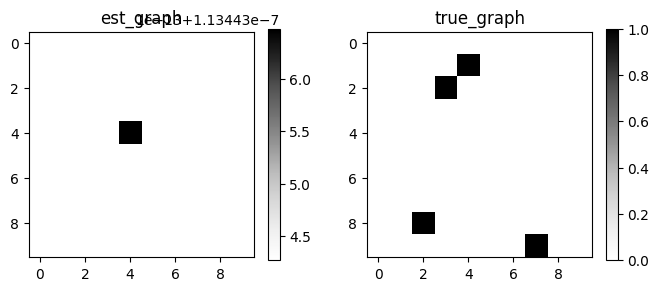

In [6]:
from castle.common import GraphDAG
GraphDAG(edge_probs, event_edges)